# About the Data
This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.
Citation: 
Borzooei,Shiva and Tarokhian,Aidin. (2023). Differentiated Thyroid Cancer Recurrence. UCI Machine Learning Repository. https://doi.org/10.24432/C5632J.

### Import Data
First, we will import the data from the dataset using Panda

In [129]:
import pandas as pd

file_path = 'Thyroid_Diff.csv'
thyroid_data = pd.read_csv(file_path)

thyroid_data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


### Data Quality: Introducing data impurities
According to the UCI website, this data contains mostly clean data. Therefore, we will run a few commands to introduce missing values and duplicate data.

##### 1. Introduce Missing Values
First, we will randomly choose 3% and introudce missing values denoted by a '?' to the columns 'Age', 'Thyroid Function' and 'Physical Examination'.

In [130]:
import numpy as np

np.random.seed(177)

columns_with_missing_values = ['Age','Thyroid Function', 'Physical Examination']

for column in columns_with_missing_values:
    indices = np.random.choice(thyroid_data.index, size=int(len(thyroid_data) * 0.03), replace=False)
    thyroid_data[column] = thyroid_data[column].astype('object')
    thyroid_data.loc[indices, column] = '?'

thyroid_data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


##### 2. Add artificial outliers
Next, let's add some outliers to the data. We will take 4 records and then change the age values to low and high outlier values.

In [131]:
outlier_data = thyroid_data.iloc[:4].copy()

outlier_ages = [1, 3, 115, 109]
outlier_data['Age'] = outlier_ages


thyroid_data = pd.concat([thyroid_data, outlier_data], ignore_index=True)

thyroid_data.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
382,67,M,Yes,No,No,?,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
383,1,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
384,3,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
385,115,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
386,109,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


##### 3. Duplicate Values
Next, we will randomly pick 2% of the dataset and then copy them to introduce duplicate values.

In [132]:
num_duplicates = int(len(thyroid_data) * 0.02)

duplicate_indices = np.random.choice(thyroid_data.index, size=num_duplicates, replace=False)
duplicates = thyroid_data.loc[duplicate_indices].copy()


thyroid_data = pd.concat([thyroid_data, duplicates], ignore_index=True)


In [133]:
thyroid_data.to_csv('Impure_Thyroid_Data.csv', index = False)

### Dealing with Data Quality Issues

Now that we have artificially introduced some impurities in the dataset, we will deal with them accordingly.


### Missing values

Since there are missing values with '?', we will count them and then replace them with Nan

In [134]:
import numpy as np

data = pd.read_csv('Impure_Thyroid_Data.csv')

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 394
Number of attributes = 17
Number of missing values:
	Age: 12
	Gender: 0
	Smoking: 0
	Hx Smoking: 0
	Hx Radiothreapy: 0
	Thyroid Function: 11
	Physical Examination: 12
	Adenopathy: 0
	Pathology: 0
	Focality: 0
	Risk: 0
	T: 0
	N: 0
	M: 0
	Stage: 0
	Response: 0
	Recurred: 0


There are three columns with missing values: Age, Thyroid Function and Physical Examination. Since Age has numerical values, we will replace the missing values with the mean of the age column and remove the missing values for Thyroid Function and Physical Examination. However, before we replace the missing Age values with the mean, we will first deal with the Outliers so that we don't skew the data.

##### Remove the missing values for 'Physical Examination' and 'Thyroid Function'

In [135]:
print('Number of rows in original data = %d' % (data.shape[0]))

data = data.dropna(subset= ['Physical Examination', 'Thyroid Function'])
print('Number of rows after discarding missing values = %d' % (data.shape[0]))

Number of rows in original data = 394
Number of rows after discarding missing values = 371


##### Before we replace the missing values for Age with the mean, we will first deal with the Outliers.

### Outliers

Now, we will look at the Outliers in the 'Age' column. 

<Axes: >

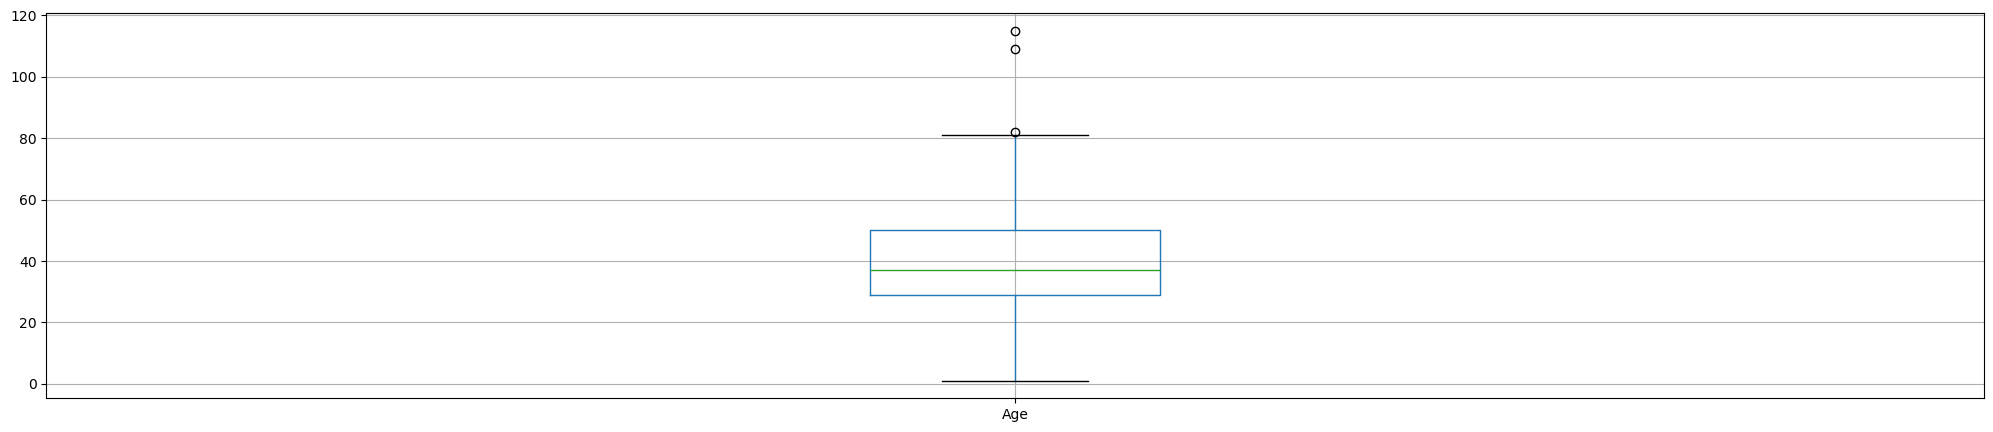

In [136]:
%matplotlib inline

data['Age'] = pd.to_numeric(data['Age'])
data.boxplot(column= ['Age'], figsize = (25, 5))

Now, we will calculate the z score for the age column.

In [137]:
data2 = data['Age']
Z = (data2-data2.mean())/data2.std()
Z[20:25]

22   -0.281929
23    1.854151
24    1.225892
25   -0.470407
26    0.157852
Name: Age, dtype: float64

Now, we will discard the rows with Z > 3 or Z <=-3

In [138]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = data[(Z <= 3) & (Z >= -3) | data['Age'].isna()]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 371
Number of rows after discarding outliers = 369


In [139]:
data = Z2

In [140]:
data2 = data
print('Number of instances = %d' % (data2.shape[0]))

print('Number of missing values:')
for col in data2.columns:
    print('\t%s: %d' % (col,data2[col].isna().sum()))

Number of instances = 369
Number of missing values:
	Age: 12
	Gender: 0
	Smoking: 0
	Hx Smoking: 0
	Hx Radiothreapy: 0
	Thyroid Function: 0
	Physical Examination: 0
	Adenopathy: 0
	Pathology: 0
	Focality: 0
	Risk: 0
	T: 0
	N: 0
	M: 0
	Stage: 0
	Response: 0
	Recurred: 0


In [141]:
data.to_csv('cleaned_dataset.csv', index = False)

In [142]:
data = pd.read_csv('cleaned_dataset.csv')
med = data['Age'].median()
data['Age'] = data['Age'].fillna(med).round().astype(int)

data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [143]:
data.to_csv('cleaned_data2.csv', index = False)

In [144]:
data = pd.read_csv('cleaned_data2.csv')

### Duplicate Values
Let's find duplicate values in the dataset.

In [145]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 21


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
11,49,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
28,37,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


Now, we'll remove the duplicate data from the dataset.


In [146]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

data = data2


Number of rows before discarding duplicates = 369
Number of rows after discarding duplicates = 348


Now, we will save the cleaned dataset for further processing.

In [147]:
data.to_csv('cleaned_Thyroid_data.csv', index = False)

### Shuffling Datasets

In [148]:
import os
import numpy as np
import pandas as pd

path = "./"

filename_read = os.path.join(path,"cleaned_Thyroid_data.csv")
df = pd.read_csv(filename_read, na_values=['NA','?'])

df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,37,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,High,T4a,N1b,M1,IVB,Structural Incomplete,Yes
1,38,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T1b,N0,M0,I,Excellent,No
2,33,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
3,32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
4,34,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,High,T3a,N1a,M0,I,Biochemical Incomplete,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,56,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
344,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
345,61,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Intermediate,T3a,N0,M0,II,Excellent,No
346,26,F,No,Yes,No,Subclinical Hyperthyroidism,Single nodular goiter-right,No,Hurthel cell,Uni-Focal,Low,T2,N0,M0,I,Excellent,No


### Sorting Dataframes

In [149]:
df = df.sort_values(by='Age', ascending=True)
print(df)

     Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
50     1      F      No         No              No        Euthyroid   
323    3      F      No        Yes              No        Euthyroid   
239   15      F      No         No              No        Euthyroid   
76    17      F      No         No              No        Euthyroid   
62    17      F      No        Yes              No        Euthyroid   
..   ...    ...     ...        ...             ...              ...   
53    79      M     Yes         No              No        Euthyroid   
258   80      F     Yes         No              No        Euthyroid   
123   81      M     Yes         No             Yes        Euthyroid   
253   81      F      No         No              No        Euthyroid   
77    82      M     Yes         No              No        Euthyroid   

            Physical Examination Adenopathy       Pathology     Focality  \
50    Single nodular goiter-left         No  Micropapillary    Uni-Foca

In [150]:
print("The first age is: {}".format(df['Age'].iloc[0]))

The first age is: 1


In [151]:
print("The first age is: {}".format(df['Age'].loc[0]))

The first age is: 37


### Saving A Dataset

In [5]:
import os
import pandas as pd
import numpy as np

path = "./"

filename_read = os.path.join(path, "cleaned_Thyroid_data.csv")
filename_write = os.path.join(path, "cleaned_Thyroid_data-shuffled.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
df = df.reindex(np.random.permutation(df.index))
df.to_csv(filename_write,index=False)   # Specify index = false to not write row numbers
print("Done")

Done
